# Transaction Data Generator 
Similate transaction data for Python tutorials 

In [1]:
#imports
import numpy as np
import pandas as pd
import random
import string

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import csv
import datetime
from datetime import timedelta,datetime, date

In [2]:
#Customer type details
cust_types = {'Young Professional': { 'min_income':20000, 'max_income':100000, 'proportion':0.18},
              'Experienced Professional': { 'min_income':50000, 'max_income':200000, 'proportion':0.28},
              'Parent': { 'min_income':50000, 'max_income':200000, 'proportion':0.15},
              'College Student': { 'min_income':5000, 'max_income':25000, 'proportion':0.09},
              'School Student': { 'min_income':2000, 'max_income':8000, 'proportion':0.05},
              'Retired': { 'min_income':10000, 'max_income':50000, 'proportion':0.2},
              'Unemployed': { 'min_income':1000, 'max_income':5000, 'proportion':0.05}}

#Expenditure types
exp_types = ['Groceries','Clothing','Housing','Education','Health',
             'Motor/Travel','Entertainment','Gambling','Savings',
             'Bills and Utilities','Tax','Fines']

#Proporition of income going to each expenditure group
exp_prop = {'Young Professional':[0.04,0.12,0.16,0.08,0.04,0.08,0.24,0.08,0.04,0.04,0.04,0.04],
        'Experienced Professional':[0.08,0.08,0.15,0.04,0.08,0.08,0.15,0.08,0.08,0.08,0.08,0.04],
        'Parent':[0.15,0.04,0.23,0.15,0.08,0.04,0.04,0.08,0.04,0.08,0.04,0.04],
        'College Student':[0.09,0.04,0.09,0.35,0.04,0.09,0.13,0.04,0.04,0.04,0,0.04],
        'School Student':[0.05,0.02,0,0.05,0,0.19,0.65,0,0.05,0,0,0],
        'Retired':[0.09,0.04,0.22,0,0.18,0.07,0.15,0.15,0,0.07,0.01,0.01],
        'Unemployed':[0.1,0,0.2,0,0.05,0.4,0,0.1,0,0.1,0,0.05]}

#Behaviour of each expenditure group
exp_behave = {'Exclude':[0,0,0.5,0.5,0,0.2,0,0.8,0.5,0,0,0.9],
'Exclude Monthly':[0,0.5,0,0,0.5,0.2,0,0.1,0.2,0,0,0.9],
'Annual Inflation':[0.08,0.08,0.05,0.02,0.05,0.2,0.02,0.05,0,0.02,0,0],
'Holiday Increase':[1,1,0,0,0,1,1,1,0,0,0,0],
'Regular Min':[0,0,1,1,0,0,0,0,0,1,1,0],
'Regular Max':[1,0,1,1,1,1,1,0,1,1,1,0],
'Regular %':[0.1,0,1,0.9,0.8,0.5,0.2,0,0.8,0.9,1,0],
'Sporatic Min':[4,1,0,1,2,4,5,5,1,1,0,1],
'Sporatic Max':[20,8,0,2,6,20,80,10,2,2,0,2],
'Sporatic Variation':[0.05,0.1,0,0.2,0.2,0.2,0.3,0.5,0.5,0.2,0,0.5]}

In [3]:
def base_income(cust_type):
    """
    Generate base income value for given customer type. 
    """
    
    #Get customer income range 
    min_income = cust_types[cust_type]['min_income']
    max_income = cust_types[cust_type]['max_income']
    
    #Create random income within customer range 
    income = round(np.random.uniform(min_income,max_income))
    
    return income

def time_range():
    """
    Generate random time range for customer. These are the dates 
    that the customer started and stoped making payments.
    """
    
    #Start date
    add_month = np.random.randint(0,120)
    start_dt = date(2010, 1, 1) + pd.DateOffset(months=add_month)
    
    #End date
    add_month  = np.random.randint(6,120)
    end_dt = start_dt + pd.DateOffset(months=add_month)
    
    #End date cutoff 
    cutoff = date(2020, 12, 1)+ pd.DateOffset(months=0)
    if end_dt >= cutoff:
        end_dt = cutoff 
    
    return start_dt.date(), end_dt.date()

def generate_id(id_type):
    
    """
    Generate a random customer or transaction ID
    """
    
    if id_type == 'T':
        r_string = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(14))
    else:
        r_string = ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(9))
    return id_type + r_string



2014-03-01 2019-11-01
68


69

In [ ]:
def months_between(start_dt,end_dt):
    
    """
    Calculate the number of months between two dates
    """
    
    return (end_dt. year - start_dt. year) * 12 + (end_dt.month - start_dt.month)

def month_adjust(start_dt,end_dt):
    
    """
    Will return a list of arrays. There will be one array for each month that 
    the customer makes payments. Each array will include an adjustment for 
    each expenditure group. The adjustments take into account: 
        - Exlusion (i.e. if the expenditure group is excluded in the given month)
        - Inflation 
        - Holiday increase
    """
    
    #Number of months used for inflation adjustment
    months = pd.date_range(start_dt,end_dt,freq='MS')
    inf_months = [months_between(date(2010, 1, 1),dt) for dt in months]
    
    adjust = []
    for m in months:
        
        #monthly exclude 
        exclude_monthly = [1-np.random.binomial(n=1,p=float(per)) for per in exp_behave['Exclude Monthly']]
        
        #inflation adjustment
        inf_months = months_between(date(2010, 1, 1),m)
        inf = [(1+i)**(inf_months/12) for i in exp_behave['Annual Inflation']]
        
        #Holiday increase
        hol_inc = [1]*len(inf)
        if m.month == 10:
            hol_inc += np.array(exp_behave['Holiday Increase'])*0.1
        elif m.month == 11:
            hol_inc += np.array(exp_behave['Holiday Increase'])*0.2
        elif m.month == 12:
            hol_inc += np.array(exp_behave['Holiday Increase'])*0.3
        
        #Bring together
        adjust.append(np.array(exclude_monthly)*inf*hol_inc)
        
    return adjust

def generate_income(cust_type,start_dt,end_dt):
    
    """
    Generate monthly income amounts groing to each expediture group. 
    """
    
    #Generate base income
    income = base_income(cust_type)

    #Get proporition of income going to each expenditure group
    base_prop = exp_prop[cust_type]
    
    #Exclude some expenditure groups and make some monthly adjustments to proprtions
    exclude = [1-np.random.binomial(n=1,p=float(per)) for per in exp_behave['Exclude']]
    month_adj = month_adjust(start_dt,end_dt)
    month_prop = np.array([m*base_prop*exclude for m in month_adj])

    #Convert proprtions to income values
    month_income = month_prop*(income/12)
    
    return month_income

In [5]:
def generate_regular(inc_regular,start_dt):
    
    """
    Generate regular monthly transactions. Will return an array of
    transaction arrays. Each transaction array contains the details 
    of an individual transaction. 
    """
    
    #Regular payments will occur on the same day each month 
    offset_days = {}
    for exp in exp_types:
        offset_days[exp] = day = np.random.randint(0,10) 

    transactions = []
     #Looping over income values allowes us to create transactions for each month
    for i,inc in enumerate(inc_regular):
        
        #j will give us the position of the relevant income value
        #(i.e. the income value in inc_regular that corresponds to given exp_type)
        for j,exp in enumerate(exp_types):
            
            #Generate transactions if income not 0 
            if inc[j] > 0:
                trans_id = generate_id("T")
                date = start_dt + pd.DateOffset(months=i,days=offset_days[exp])
                amount = round(inc[j],2)
                exp_type = exp
                
                #Transaction array
                trans_array = [trans_id,str(date.date()),
                     date.year,date.month,date.day,
                     exp_type,amount]

                transactions.append(trans_array)
            
    return transactions
        


In [6]:
def generate_sporatic(inc_sporatic,start_dt):
    
     """
    Generate sporatic monthly transactions. Will return an array of
    transaction arrays. Each transaction array contains the details 
    of an individual transaction. 
    """
    
    transactions = []
    #Looping over income values allowes us to create transactions for each month
    for i,inc in enumerate(inc_sporatic):
        
        #Calculate number of sporatic payments for given month
        n_sporatic = [np.random.randint(l,h+1) 
          for l,h in zip(exp_behave['Sporatic Min'], exp_behave['Sporatic Max'])]
        
        #j will give us the position of the relevant income value
        #(i.e. the income value in inc_sporatic that corresponds to given exp_type)
        for j,exp in enumerate(exp_types):
            
            #Generate transactions
            n_payments = n_sporatic[j]
            for n in range(n_payments):
                if inc[j] > 0:
                    trans_id = generate_id("T")
                    date = start_dt + pd.DateOffset(months=i,days=np.random.randint(0,27))
                    var = exp_behave['Sporatic Variation'][j]
                    var = np.random.uniform(-var,var)
                    amount = round((inc[j]/n_payments)*(1+var),2)
                    exp_type = exp
                    
                    #transaction array
                    trans_array = [trans_id,str(date.date()),
                     date.year,date.month,date.day,
                     exp_type,amount]

             
                    transactions.append(trans_array)

    return transactions
         

In [8]:
def generate_transactions(cust_type,month_income,start_dt):
    
    """
   Generate regular monthly and sporatic payments for all expediture groups
    """

    #Get number of regular payments 
    n_regular = [np.random.randint(l,h+1) 
             for l,h in zip(exp_behave['Regular Min'], exp_behave['Regular Max'])]

    #Get proportion of income going to regular and sporatic payments 
    binary_regular = [0 if n == 0 else 1 for n in n_regular]
    per_regular = np.array(exp_behave['Regular %'])*binary_regular
    per_sporatic = [round(1-p,2) for p in per_regular]

    #Get income going to regular and sporatic payments 
    inc_regular = [per_regular*m for m in month_income]
    inc_sporatic = [per_sporatic*m for m in month_income]

    #Generate transactions
    trans_regular = generate_regular(inc_regular,start_dt)
    trans_sporatic = generate_sporatic(inc_sporatic,start_dt)
    
    #Create final transaction array 
    trans_all = [*trans_regular,*trans_sporatic]
    np.random.shuffle(trans_all)
    
    return trans_all
    

#Example
cust_type = 'Young Professional'
start_dt, end_dt = time_range()
month_income = generate_income(cust_type,start_dt,end_dt)
transactions = generate_transactions(cust_type,month_income,start_dt)
print(transactions)

[['TLTPUL231YQUJKR', '2019-09-01', 2019, 9, 1, 'Entertainment', 12.16], ['TJWDR6O8E01QRNF', '2019-05-25', 2019, 5, 25, 'Entertainment', 11.53], ['T9E2C3Q3N44DPHC', '2017-01-10', 2017, 1, 10, 'Entertainment', 7.72], ['TM5O5PDJY63ADQM', '2020-11-19', 2020, 11, 19, 'Groceries', 21.07], ['TY4MZZED7YBT5A2', '2016-07-15', 2016, 7, 15, 'Motor/Travel', 28.44], ['TF3ZC4VYYNPO421', '2020-02-03', 2020, 2, 3, 'Motor/Travel', 36.36], ['TI0RK57QTYM6TPL', '2019-09-18', 2019, 9, 18, 'Groceries', 12.36], ['TV98STPO54EC6O5', '2019-11-10', 2019, 11, 10, 'Entertainment', 57.76], ['T5OOWEXCRQ0IPY9', '2017-01-24', 2017, 1, 24, 'Entertainment', 7.91], ['T7IKZ3HWSB42UZS', '2017-11-20', 2017, 11, 20, 'Motor/Travel', 31.65], ['TZL99PAOZ4S58IX', '2018-06-09', 2018, 6, 9, 'Tax', 130.21], ['TFH6KT8DCE7HNDO', '2019-05-20', 2019, 5, 20, 'Entertainment', 12.84], ['T698BVZSZ1WBPKX', '2016-11-01', 2016, 11, 1, 'Motor/Travel', 71.91], ['TWXF3AN71Z6Q0OQ', '2017-09-14', 2017, 9, 14, 'Entertainment', 28.34], ['TOBHFNXE3NFL

In [9]:
#Generate transactions for 75000 customers
n = 75000

# create the csv writer
f = open('/Users/conorosully/Desktop/transactions.csv', 'w')
writer = csv.writer(f)

#Write titles
titles = ['CUST_ID','START_DATE','END_DATE','TRANS_ID','DATE','YEAR','MONTH','DAY','EXP_TYPE','AMOUNT']
writer.writerow(titles)


for c in cust_types.keys():
    
    cust_n = round(n*cust_types[c]['proportion'])
    for i in range(cust_n):
        
        #Generate transactions
        cust_id = "C" + ''.join(random.choice(string.ascii_uppercase + string.digits) for _ in range(9))
        start_dt, end_dt = time_range()
        month_income = generate_income(c,start_dt,end_dt)
        transactions = generate_transactions(cust_type,month_income,start_dt)
        
        if end_dt == date(2020, 12, 1):
            end_dt = None
            
        for t in transactions:
            row = [cust_id,start_dt,end_dt,*t]
            
            # write a row to the csv file
            writer.writerow(row)
    print(c)
        
        
# close the file  
f.close()

Young Professional
Experienced Professional
Parent
College Student
School Student
Retired
Unemployed


# Data visulisations

In [2]:
#Get a sample of transactions 
transactions = pd.read_csv('/Users/conorosully/Desktop/transactions.csv',nrows=5000000)
transactions.head()

,CUST_ID,START_DATE,END_DATE,TRANS_ID,DATE,YEAR,MONTH,DAY,EXP_TYPE,AMOUNT
0,CI6XLYUMQK,2015-05-01,NaN,T8I9ZB5A6X90UG8,2015-09-11,2015,9,11,Motor/Travel,20.27
1,CI6XLYUMQK,2015-05-01,NaN,TZ4JSLS7SC7FO9H,2017-02-08,2017,2,8,Motor/Travel,12.85
2,CI6XLYUMQK,2015-05-01,NaN,TTUKRDDJ6B6F42H,2015-08-01,2015,8,1,Housing,383.80
3,CI6XLYUMQK,2015-05-01,NaN,TDUHFRUKGPPI6HD,2019-03-16,2019,3,16,Entertainment,5.72
4,CI6XLYUMQK,2015-05-01,NaN,T0JBZHBMSVRFMMD,2015-05-15,2015,5,15,Entertainment,11.06


In [9]:
len(transactions['CUST_ID'].unique())

1332

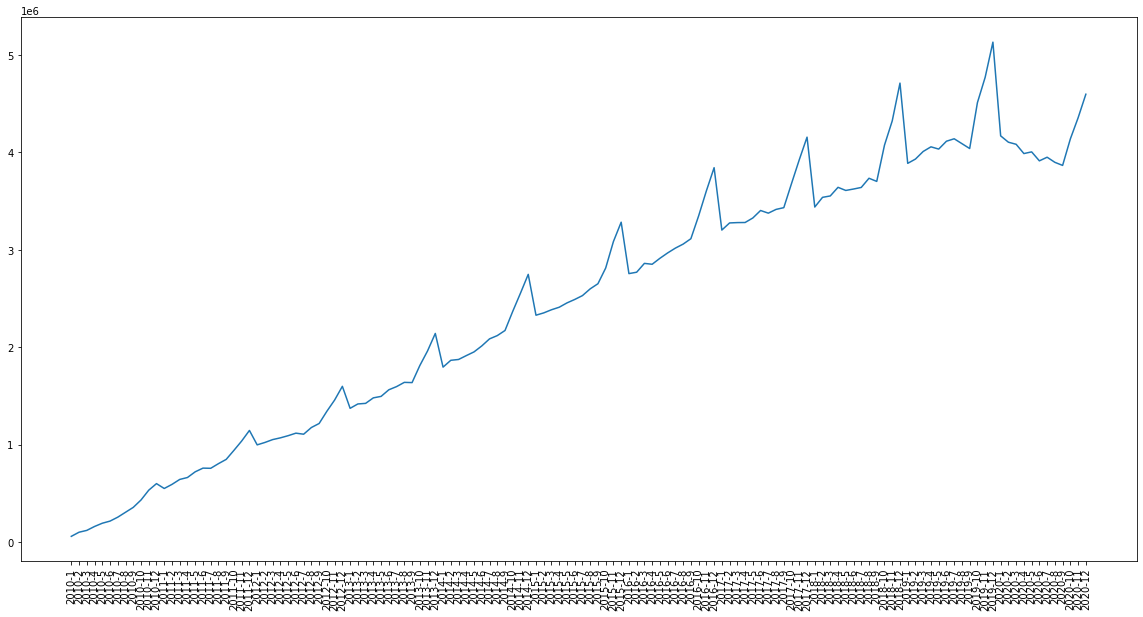

In [24]:
#total expenditure
total_exp = transactions.groupby(['YEAR','MONTH'],as_index=False)['AMOUNT'].sum()
x_label = ['{}-{}'.format(y,m) for y,m in zip(total_exp['YEAR'],total_exp['MONTH'])]
x_ticks = range(len(x_label))

plt.figure(figsize=(20, 10))
plt.plot(total_exp['AMOUNT'])
plt.xticks(ticks=x_ticks, labels=x_label,rotation=90)
print()

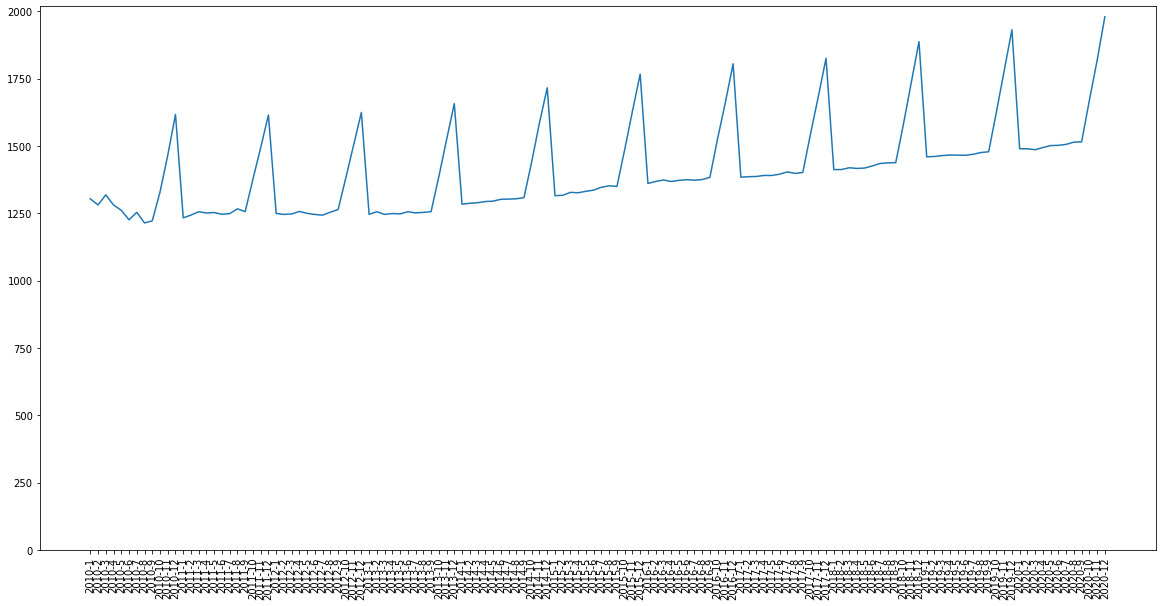

In [9]:
#Average monthly entertainment expenditure
total_exp = transactions[transactions.EXP_TYPE=='Entertainment'].groupby(['CUST_ID','YEAR','MONTH'],as_index=False)['AMOUNT'].sum()
avg_exp = total_exp.groupby(['YEAR','MONTH'],as_index=False)['AMOUNT'].mean()

x_label = ['{}-{}'.format(y,m) for y,m in zip(avg_exp['YEAR'],avg_exp['MONTH'])]
x_ticks = range(len(x_label))

plt.figure(figsize=(20, 10))
plt.plot(avg_exp['AMOUNT'])
plt.xticks(ticks=x_ticks, labels=x_label,rotation=90)
plt.ylim(bottom=0)
print()

In [10]:
#%customers who received a fine 
total_exp = transactions[transactions.EXP_TYPE=='Entertainment'].groupby(['CUST_ID','YEAR','MONTH'],as_index=False)['AMOUNT'].sum()
avg_exp = total_exp.groupby(['YEAR','MONTH'],as_index=False)['AMOUNT'].mean()

# Tests and Sense Checks

In [178]:
test_df['Housing_miss'] = [1 if x != 0 else 0 for x in test_df['Housing']]
test_df['Fines_miss'] = [1 if x != 0 else 0 for x in test_df['Fines']]

In [179]:
test_df[test_df.month_n==1].groupby(['cust_type']).mean()

,income,month_n,Groceries,Clothing,Housing,Education,Health,Motor/Travel,Entertainment,Gambling,Savings,Bills and Utilities,Tax,Fines,Housing_miss,Fines_miss
cust_type,,,,,,,,,,,,,,,,
College Student,14966.329231,1.0,2112.864872,1210.729527,864.861413,689.939506,841.782754,2875.195938,1423.723767,132.431494,459.051538,1423.723767,1247.194103,0.000000,0.489231,0.000000
Experienced Professional,126426.954631,1.0,17512.415926,8690.552526,6313.899546,5766.826650,6897.573634,21751.148832,11964.886737,2896.285472,4051.570573,11964.886737,10535.579553,110.057656,0.457467,0.014178
Parent,133536.463122,1.0,18663.648510,9048.699524,6881.018559,5905.913648,7674.629242,25299.329956,12668.518231,1888.568225,4364.943539,12668.518231,11128.038593,27.178674,0.473413,0.001715
Retired,29711.363636,1.0,4131.489006,2055.534957,1753.201852,1470.266706,1642.237053,5763.134382,2814.980637,550.457362,1065.464719,2814.980637,2475.946970,37.559740,0.489610,0.012987
School Student,4369.718563,1.0,615.788292,297.333456,248.427259,234.631585,289.499782,787.994415,415.190385,152.156760,173.042914,415.190385,364.143214,2.493014,0.508982,0.005988
Unemployed,3122.715152,1.0,463.619107,237.173474,192.896323,148.154991,192.137692,614.849740,301.003971,46.198874,99.833838,301.003971,260.226263,11.188384,0.472727,0.042424
Young Professional,61295.553161,1.0,8416.584853,4049.172359,3534.863123,3019.626811,3702.821210,11503.727395,5786.601239,1536.955472,1869.090398,5786.601239,5107.962763,28.696480,0.520115,0.005747


In [180]:
test_df[test_df.month_n==10].groupby(['cust_type']).mean()

,income,month_n,Groceries,Clothing,Housing,Education,Health,Motor/Travel,Entertainment,Gambling,Savings,Bills and Utilities,Tax,Fines,Housing_miss,Fines_miss
cust_type,,,,,,,,,,,,,,,,
College Student,14885.039437,10.0,2380.117516,1249.752187,869.540911,673.432393,907.885626,3276.860355,1568.476670,172.634796,486.537559,1425.887882,1240.419953,25.876526,0.490141,0.016901
Experienced Professional,126144.064572,10.0,19727.998781,9723.599924,6410.363310,5858.495299,7325.110656,26156.509870,13214.396370,3213.820791,3744.900015,12013.087609,10512.005381,153.813845,0.458988,0.013089
Parent,133558.321767,10.0,21158.545929,10255.246833,7040.536220,6064.214010,8350.656984,30521.191194,14038.690122,1988.596432,4197.188617,12762.445565,11129.860147,32.275368,0.473186,0.003155
Retired,29675.768765,10.0,4672.967448,2225.112448,1791.980176,1513.986971,1670.586959,7065.235334,3114.612463,578.884967,1014.090496,2831.465875,2472.980730,22.576776,0.493947,0.008475
School Student,4443.163043,10.0,715.919901,371.720775,246.606651,241.816025,263.982450,883.052041,468.877466,169.129258,192.205616,426.252242,370.263587,0.978261,0.494565,0.005435
Unemployed,3133.312169,10.0,525.882259,258.247394,194.922481,150.471236,195.576216,697.283406,334.413874,51.125313,96.158730,304.012613,261.109347,5.709877,0.470899,0.015873
Young Professional,60935.115127,10.0,9532.318947,4798.548304,3519.671563,3087.426293,3538.659269,13619.527407,6382.869588,1534.399641,1839.274096,5802.608716,5077.926261,34.542392,0.511379,0.006693


In [181]:
test_df[test_df.month_n==11].groupby(['cust_type']).mean()

,income,month_n,Groceries,Clothing,Housing,Education,Health,Motor/Travel,Entertainment,Gambling,Savings,Bills and Utilities,Tax,Fines,Housing_miss,Fines_miss
cust_type,,,,,,,,,,,,,,,,
College Student,14995.988827,11.0,2620.818588,1136.892148,859.129087,669.687493,905.036136,3779.767399,1724.665864,208.621607,463.676676,1437.221553,1249.665736,1.414339,0.480447,0.002793
Experienced Professional,126196.405382,11.0,21632.801874,10834.894892,6497.559679,5810.988334,7598.052108,29589.827972,14438.228213,3431.238004,3905.090784,12031.856844,10516.367115,94.678385,0.462674,0.011285
Parent,133101.393417,11.0,23102.623512,11600.886525,7022.151348,5978.320267,8036.135789,33254.744396,15279.357497,2555.785332,4042.484195,12732.797914,11091.782785,32.641980,0.473354,0.003135
Retired,29633.677033,11.0,5111.710522,2712.257641,1786.996548,1521.326644,1691.163711,7702.230891,3396.437959,703.046750,1060.605263,2830.364966,2469.473086,35.522727,0.490431,0.014354
School Student,4470.274194,11.0,788.524029,410.566303,248.498491,245.581689,262.992921,1145.976740,515.026017,191.765794,192.871864,429.188348,372.522849,2.238351,0.494624,0.005376
Unemployed,3123.809524,11.0,575.429564,292.742871,193.806448,150.035072,173.192619,835.702603,364.284011,52.886680,94.713845,303.570010,260.317460,8.954586,0.465608,0.026455
Young Professional,60889.801577,11.0,10428.609576,5309.172390,3566.074021,3039.034560,3630.820491,15043.230022,6963.322255,1685.800312,1863.586837,5802.768546,5074.150131,23.621003,0.517740,0.005256


In [182]:
test_df[test_df.month_n==12].groupby(['cust_type']).mean()

,income,month_n,Groceries,Clothing,Housing,Education,Health,Motor/Travel,Entertainment,Gambling,Savings,Bills and Utilities,Tax,Fines,Housing_miss,Fines_miss
cust_type,,,,,,,,,,,,,,,,
College Student,15015.280992,12.0,2851.988920,1251.504570,851.939576,670.375042,857.103172,4410.409706,1872.269828,222.048727,480.839991,1440.207560,1251.273416,9.591139,0.473829,0.005510
Experienced Professional,125972.985395,12.0,23481.213484,11389.731059,6575.709045,5865.845139,7563.690407,31243.797646,15628.348634,3593.306905,3820.479525,12021.806641,10497.748783,104.931057,0.467354,0.012027
Parent,133012.145086,12.0,25109.877154,11970.809577,6981.626122,5968.878290,7460.554744,36666.535302,16558.288265,2530.527526,4421.754680,12737.144819,11084.345424,77.715679,0.469579,0.007800
Retired,29564.517160,12.0,5534.094796,2663.342006,1786.660048,1514.728198,1789.971835,8306.921750,3672.060724,751.195252,1055.069724,2824.662095,2463.709763,16.837673,0.489941,0.004734
School Student,4458.149733,12.0,854.785902,441.315867,247.407263,238.575334,278.539567,1142.022979,556.840449,212.465919,175.902406,428.338807,371.512478,0.000000,0.486631,0.000000
Unemployed,3134.505208,12.0,629.945178,310.822890,197.295844,152.595951,188.173370,921.167729,396.703004,68.045535,105.784288,305.156157,261.208767,8.523872,0.473958,0.026042
Young Professional,61174.950649,12.0,11380.288102,5879.349559,3602.009711,3053.876774,3498.957193,17458.977614,7583.347213,1942.627549,1786.189935,5833.344010,5097.912554,27.529545,0.518182,0.003896


In [173]:
test_df[test_df.month_n==12].groupby(['cust_type']).count()

,income,start_dt,end_dt,month,month_n,Groceries,Clothing,Housing,Education,Health,Motor/Travel,Entertainment,Gambling,Savings,Bills and Utilities,Tax,Fines
cust_type,,,,,,,,,,,,,,,,,
College Student,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363,363
Experienced Professional,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164,1164
Parent,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641,641
Retired,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845,845
School Student,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187,187
Unemployed,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192
Young Professional,770,770,770,770,770,770,770,770,770,770,770,770,770,770,770,770,770


In [175]:
test_df.groupby(['month']).mean()

,income,month_n,Groceries,Clothing,Housing,Education,Health,Motor/Travel,Entertainment,Gambling,Savings,Bills and Utilities,Tax,Fines
month,,,,,,,,,,,,,,
2010-01-01,106148.500000,1.0,8845.708333,6748.858333,4440.575000,1750.558333,3722.908333,3507.358333,8845.708333,669.533333,3296.316667,8845.708333,8845.708333,745.500000
2010-02-01,101817.894737,2.0,8539.416178,5176.544878,3973.130115,3226.622875,4303.976943,4428.187646,8498.837939,1857.039496,3158.609649,8498.837939,8484.824561,0.000000
2010-03-01,106043.772727,3.0,8951.061687,3833.014367,4376.153367,2980.924411,3373.525790,4967.100346,8866.195151,2392.111682,3716.617424,8866.195151,8836.981061,0.000000
2010-04-01,103211.640000,4.0,8768.057147,3335.142299,4681.691599,3436.648288,4680.362149,5300.840659,8643.656026,2277.747497,3192.606667,8643.656026,8600.970000,0.000000
2010-05-01,98449.566667,5.0,8417.319548,4045.820190,4270.965251,3543.110613,4268.641656,4185.738308,8258.464129,2431.733930,1582.913889,8258.464129,8204.130556,0.000000
2010-06-01,97957.343750,6.0,8429.121595,4259.923357,4416.305986,3327.152202,3280.354974,5324.545607,8230.745230,2156.384645,3872.635417,8230.745230,8163.111979,0.000000
2010-07-01,84580.853659,7.0,7324.916794,4624.776321,4046.139721,2799.707986,3967.688066,4971.711052,7118.539577,1698.684098,3162.693089,7118.539577,7048.404472,0.000000
2010-08-01,82467.625000,8.0,7187.857061,2702.858154,4061.243873,2902.082355,3102.085350,4345.882829,6952.147988,1739.868865,2388.112847,6952.147988,6872.302083,0.000000
2010-09-01,81938.888889,9.0,7187.722937,3751.131387,3987.834414,3225.875225,4537.514032,3878.284815,6918.983140,1307.333020,2738.350309,6918.983140,6828.240741,0.000000


In [154]:
test_df['start_dt'].value_counts()

2012-07-01    6473
2012-06-01    6163
2012-11-01    6073
2013-12-01    6063
2011-09-01    6050
2010-12-01    6046
2013-04-01    5894
2013-02-01    5864
2014-01-01    5854
2010-11-01    5832
2010-03-01    5823
2013-01-01    5806
2012-05-01    5795
2013-05-01    5778
2011-08-01    5726
2010-10-01    5723
2011-10-01    5690
2010-06-01    5668
2011-02-01    5609
2010-07-01    5555
2014-06-01    5541
2012-08-01    5538
2012-02-01    5522
2010-08-01    5516
2013-11-01    5496
2010-04-01    5485
2010-01-01    5350
2014-05-01    5268
2012-12-01    5250
2012-10-01    5242
              ... 
2017-01-01    2978
2017-04-01    2858
2018-02-01    2791
2017-09-01    2786
2016-12-01    2757
2018-01-01    2635
2018-08-01    2629
2018-05-01    2625
2018-06-01    2605
2018-03-01    2598
2018-12-01    2501
2017-07-01    2457
2017-10-01    2421
2017-12-01    2346
2018-11-01    2193
2019-02-01    2136
2019-01-01    1996
2018-09-01    1944
2018-07-01    1889
2018-10-01    1685
2019-04-01    1658
2019-03-01  

In [273]:
test_df['end_dt'].value_counts()

2020-12-01    4261
2019-11-01      97
2018-12-01      94
2020-10-01      93
2019-10-01      91
2020-02-01      87
2019-12-01      87
2020-01-01      86
2018-07-01      85
2019-09-01      85
2020-07-01      85
2020-06-01      84
2020-08-01      83
2018-04-01      83
2020-09-01      81
2018-06-01      80
2019-04-01      79
2018-03-01      78
2019-05-01      78
2020-03-01      78
2019-03-01      77
2018-11-01      77
2019-06-01      77
2019-08-01      76
2018-10-01      75
2020-04-01      75
2018-08-01      74
2020-05-01      73
2019-07-01      73
2018-02-01      72
              ... 
2012-08-01      22
2012-06-01      20
2012-12-01      20
2012-09-01      20
2011-12-01      19
2012-11-01      19
2012-07-01      18
2012-10-01      18
2013-01-01      18
2013-02-01      17
2012-02-01      16
2012-03-01      13
2012-05-01      12
2011-10-01      12
2011-06-01      12
2011-09-01      11
2011-07-01      11
2012-01-01      10
2011-03-01       9
2011-08-01       8
2011-04-01       7
2011-11-01  

In [ ]:
#Won't be able to load entire dataset
transactions = pd.read_csv('/Users/conorosully/Desktop/transactions.csv')
transactions.head()

In [70]:
entertainment = transactions[transactions.EXP_TYPE == exp_types[3]]
print(len(entertainment))
#entertainment['MONTH_2'] = entertainment['YEAR'] + "-" + entertainment['MONTH'] 
entertainment.head()

4481


,CUST_ID,START_DATE,END_DATE,TRANS_ID,DATE,YEAR,MONTH,DAY,EXP_TYPE,AMOUNT
7921,CP8JUUQ277,2016-06-01,2018-09-01,TV7K2K0EYXKPQRZ,2017-01-05,2017,1,5,Education,465.17
7924,CP8JUUQ277,2016-06-01,2018-09-01,TUTFY6SMCCQ5HZ0,2018-07-05,2018,7,5,Education,479.19
8015,CP8JUUQ277,2016-06-01,2018-09-01,TRW1VL2KL9ZC4B6,2016-07-05,2016,7,5,Education,460.59
8063,CP8JUUQ277,2016-06-01,2018-09-01,T4PK4BAO8I3TN4S,2016-12-05,2016,12,5,Education,464.40
8094,CP8JUUQ277,2016-06-01,2018-09-01,TS3RZ513MCNZUPB,2016-09-05,2016,9,5,Education,462.11


In [47]:
t1 = entertainment.groupby(['CUST_ID','YEAR','MONTH']).sum()
t1.groupby(['YEAR','MONTH']).mean()

DAY      AMOUNT
YEAR MONTH                       
2010 1      25.350000  526.424250
     2      24.544118  559.860735
     3      26.875000  586.834896
     4      27.512821  616.790684
     5      25.531034  606.046138
     6      25.344444  619.263722
     7      26.883178  639.468318
     8      27.032000  646.495000
     9      26.402135  644.429217
     10     25.725309  624.894290
     11     27.387931  627.540948
     12     26.582656  625.654119
2011 1      25.853904  625.184710
     2      26.491765  628.746024
     3      26.163755  628.628275
     4      26.072187  635.429108
     5      25.569697  638.529253
     6      25.933962  637.932509
     7      26.028674  634.521989
     8      26.456706  649.065297
     9      26.805921  650.367056
     10     27.056782  638.555174
     11     26.691958  634.555766
     12     26.784457  636.618152
2012 1      26.272346  634.472584
     2      27.044355  634.558333
     3      26.225389  645.602552
     4      26.425558  638.632978
     5      26.382318  652.614731
     6      26.080645  655.582742
...               ...         ...
2018 7      26.467188  698.603646
     8      26.921762  697.827187
     9      26.104221  696.436034
     10     26.385974  702.618275
     11     26.039317  702.596684
     12     25.852544  706.710353
2019 1      26.329881  708.762600
     2      26.617602  711.223551
     3      26.292141  709.929462
     4      26.584671  712.897204
     5      26.394832  713.853514
     6      26.469673  715.155127
     7      26.726381  720.218658
     8      26.660973  723.609922
     9      26.385132  726.438394
     10     26.277749  727.455565
     11     26.326109  729.574004
     12     26.722337  724.266417
2020 1      26.403150  723.892199
     2      26.393504  725.879579
     3      26.953930  730.228444
     4      26.403182  733.736714
     5      26.635603  736.532734
     6      26.757386  735.257920
     7      26.001156  734.271289
     8      26.068007  732.512176
     9      26.295290  729.164928
     10     26.711220  731.806800
     11     26.187306  734.340423
     12     26.070476  735.203714

[132 rows x 2 columns]

In [42]:
entertainment.groupby(['YEAR','MONTH']).sum()

DAY      AMOUNT
YEAR MONTH                   
2010 1       1014    21056.97
     2       1669    38070.53
     3       2580    56336.15
     4       3219    72164.51
     5       3702    87876.69
     6       4562   111467.47
     7       5753   136846.22
     8       6758   161623.75
     9       7419   181084.61
     10      8335   202465.75
     11      9531   218384.25
     12      9809   230866.37
2011 1      10264   248198.33
     2      11259   267217.06
     3      11983   287911.75
     4      12280   299287.11
     5      12657   316071.98
     6      13745   338104.23
     7      14524   354063.27
     8      15583   382299.46
     9      16298   395423.17
     10     17154   404843.98
     11     17590   418172.25
     12     18267   434173.58
2012 1      18811   454282.37
     2      20121   472111.40
     3      20246   498405.17
     4      21299   514738.18
     5      22082   546238.53
     6      22638   569045.82
...           ...         ...
2018 7      50817  1341319.00
     8      51959  1346806.47
     9      50094  1336460.75
     10     50793  1352540.18
     11     50334  1358119.39
     12     49792  1361124.14
2019 1      50843  1368620.58
     2      51718  1381907.36
     3      50849  1373003.58
     4      51335  1376604.50
     5      51074  1381306.55
     6      51060  1379534.24
     7      51769  1395063.54
     8      51509  1398014.37
     9      51108  1407111.17
     10     50900  1409081.43
     11     51020  1413914.42
     12     51681  1400731.25
2020 1      50298  1379014.64
     2      49567  1363201.85
     3      49730  1347271.48
     4      48133  1337602.03
     5      47731  1319866.66
     6      47093  1294053.94
     7      44982  1270289.33
     8      44081  1238678.09
     9      43545  1207497.12
     10     43566  1193576.89
     11     42083  1180085.06
     12     41061  1157945.85

[132 rows x 2 columns]

In [74]:
customer = transactions[(transactions.CUST_ID=='CP8JUUQ277') &(transactions.YEAR==2018)]
customer["DATE"] = pd.to_datetime(customer["DATE"])
print(len(customer))
customer.head()

704


/Users/conorosully/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,CUST_ID,START_DATE,END_DATE,TRANS_ID,DATE,YEAR,MONTH,DAY,EXP_TYPE,AMOUNT
7914,CP8JUUQ277,2016-06-01,2018-09-01,TQYLHQEQ9KW04WW,2018-08-02,2018,8,2,Housing,1367.96
7924,CP8JUUQ277,2016-06-01,2018-09-01,TUTFY6SMCCQ5HZ0,2018-07-05,2018,7,5,Education,479.19
7926,CP8JUUQ277,2016-06-01,2018-09-01,TWRAHOE0JEZAF8W,2018-02-23,2018,2,23,Entertainment,78.63
7928,CP8JUUQ277,2016-06-01,2018-09-01,T5UL4GZLJFDTN8W,2018-03-06,2018,3,6,Entertainment,22.94
7929,CP8JUUQ277,2016-06-01,2018-09-01,T1QP1QQ5NMXBHPB,2018-04-19,2018,4,19,Entertainment,26.42


In [17]:
exp_types = ['Groceries','Clothing','Housing','Education','Health',
             'Motor/Travel','Entertainment','Gambling','Savings',
             'Bills and Utilities','Tax','Fines']

In [36]:
customer[customer.EXP_TYPE ==exp_types[4]].sort_values(by='DATE')

,CUST_ID,START_DATE,END_DATE,TRANS_ID,DATE,YEAR,MONTH,DAY,EXP_TYPE,AMOUNT
379,CTS2VR56UL,2018-01-01,NaN,TY9Q3OL7T2PYCLS,2018-03-05,2018,3,5,Health,145.77
1694,CTS2VR56UL,2018-01-01,NaN,TZSYGP8N7KT7I7C,2018-03-06,2018,3,6,Health,9.11
1828,CTS2VR56UL,2018-01-01,NaN,T82EPYOOMS6OG31,2018-03-17,2018,3,17,Health,9.11
533,CTS2VR56UL,2018-01-01,NaN,T43WZRU3Z0UXMA9,2018-03-21,2018,3,21,Health,9.11
1649,CTS2VR56UL,2018-01-01,NaN,TCYP8P1Q4WR78VK,2018-03-24,2018,3,24,Health,9.11
998,CTS2VR56UL,2018-01-01,NaN,TS5OPBKZJOTWCWC,2018-07-01,2018,7,1,Health,7.41
1199,CTS2VR56UL,2018-01-01,NaN,T12P2YYE1GLE4CG,2018-07-02,2018,7,2,Health,7.41
505,CTS2VR56UL,2018-01-01,NaN,TUKSAIO9VQRXHDH,2018-07-05,2018,7,5,Health,148.16
2274,CTS2VR56UL,2018-01-01,NaN,TGJJXOGZC8LH8MQ,2018-07-06,2018,7,6,Health,7.41
219,CTS2VR56UL,2018-01-01,NaN,TY59O9LMG70DIZI,2018-07-15,2018,7,15,Health,7.41


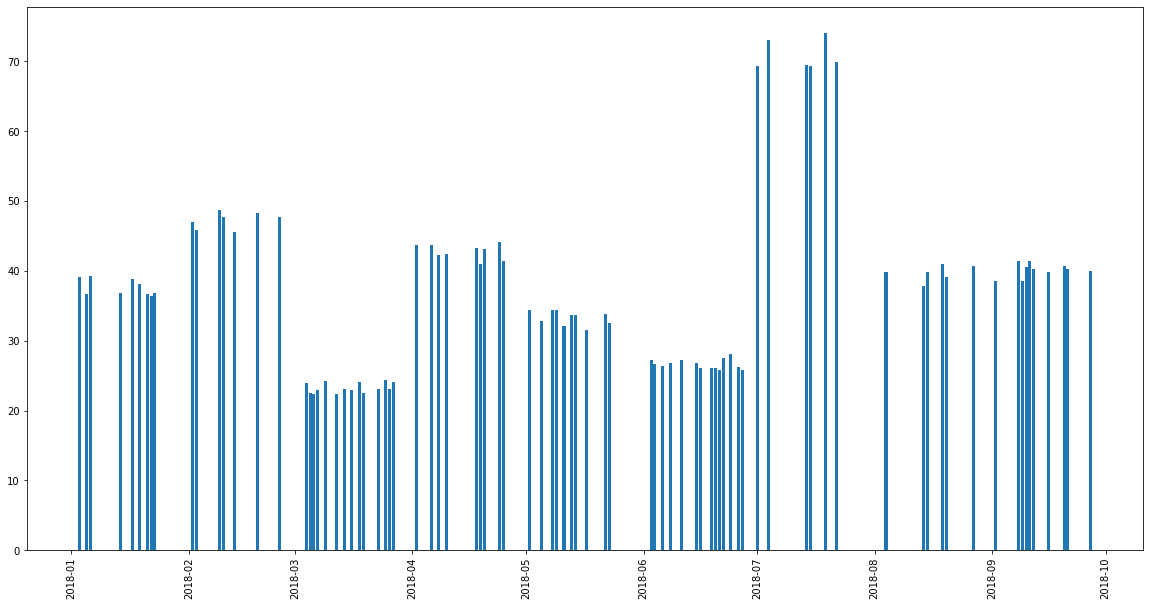

In [77]:
plt.figure(figsize=(20, 10))
plt.bar(x = 'DATE', height='AMOUNT',data=customer[customer.EXP_TYPE ==exp_types[0]])
plt.xticks(rotation=90)
print()

In [18]:
customer[customer.EXP_TYPE ==exp_types[0]]

,CUST_ID,START_DATE,END_DATE,TRANS_ID,DATE,YEAR,MONTH,DAY,EXP_TYPE,AMOUNT
5,CTS2VR56UL,2018-01-01,NaN,T7JVCBM1IYM118P,2020-04-27,2020,4,27,Groceries,22.44
6,CTS2VR56UL,2018-01-01,NaN,TQ4YWAKOEBFYZTK,2018-02-02,2018,2,2,Groceries,11.39
10,CTS2VR56UL,2018-01-01,NaN,TBV4RV00S2HLPOP,2019-09-06,2019,9,6,Groceries,17.16
25,CTS2VR56UL,2018-01-01,NaN,TBK46MCUK46K7T3,2019-11-26,2019,11,26,Groceries,44.70
36,CTS2VR56UL,2018-01-01,NaN,T7WJ8XMGDIPYIAR,2019-01-16,2019,1,16,Groceries,48.91
39,CTS2VR56UL,2018-01-01,NaN,TIAFIWX65CL3VVF,2020-01-21,2020,1,21,Groceries,13.90
40,CTS2VR56UL,2018-01-01,NaN,T8UPMD84Y5Z04SA,2019-12-07,2019,12,7,Groceries,18.95
45,CTS2VR56UL,2018-01-01,NaN,TTRO4VN4CD245S8,2019-04-22,2019,4,22,Groceries,13.12
46,CTS2VR56UL,2018-01-01,NaN,TQP9J36PXM2KM0O,2020-11-15,2020,11,15,Groceries,17.79
57,CTS2VR56UL,2018-01-01,NaN,TMA81R1B9KK74PO,2018-10-14,2018,10,14,Groceries,15.52
